# Data distribution over multiple influenza seasons
Analyze the distribution (the number of samples) of (former) IAV H1N1 data for each influenza season, under the seasonal framework as shown in Fig. 1a

## Imports

In [1]:
import os
import pandas as pd

# self defined functions
import utilities

## Variables

In [2]:
Seasons = [str(year)+s for year in range (2000, 2010) for s in ["NH", "SH"]] # all the seasons

## Paths and filenames

In [3]:
# paths
path_data   = "../data/"   # path of data
path_result = "../results/SuppFig9_H1N1/"   # results will be saved in this directory

# filenames
data_fn    = path_data + "H1N1_NHTs_GIAG010101.csv"   # input data
results_fn = path_result + "SuppFig9a_H1N1_seasonal_data_distribution.csv"   # filename for data distribution
fig_fn     = path_result + "SuppFig9a_H1N1_seasonal_data_distribution.svg"   # filename for figure

## Read dataset

In [4]:
data = pd.read_csv(data_fn)

## Find no. of samples in train and test datasets for each season

In [5]:
# to save nhts
nhts_dict = {}

# loop through each season
for season in Seasons:
    print("Season: ", season)
    

    '''
    Train Test Split
        based on seasonal framework
        Train: past isolates paired with past sera
        Test: circulating isolates paired with past sera
    '''
    ind_train, ind_test = utilities.seasonal_trainTestSplit(data[['virusDate', 'serumDate']], season)
    
    # training dataset
    data_train = data.iloc[ind_train].copy()
    data_train.reset_index(drop=True, inplace=True)
    
    # test dataset
    data_test = data.iloc[ind_test].copy()
    data_test.reset_index(drop=True, inplace=True)
    
    
    '''
    Number of data samples
    '''
    # compute and save data distribution for the training dataset
    dist_cols    = ['season', 'dataset']   # information to be saved in CSV file
    dist_col_val = [season, 'Train']
    utilities.data_distribution(data_train.nht.values, results_fn, dist_cols, dist_col_val)

    # compute and save data distribution for the test dataset
    dist_col_val = [season, 'Test']
    utilities.data_distribution(data_test.nht.values, results_fn, dist_cols, dist_col_val)

Season:  2000NH
Season:  2000SH
Season:  2001NH
Season:  2001SH
Season:  2002NH
Season:  2002SH
Season:  2003NH
Season:  2003SH
Season:  2004NH
Season:  2004SH
Season:  2005NH
Season:  2005SH
Season:  2006NH
Season:  2006SH
Season:  2007NH
Season:  2007SH
Season:  2008NH
Season:  2008SH
Season:  2009NH
Season:  2009SH


## Imports and configuration for plots

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_context(rc={"axes.labelsize":9,
                    "xtick.labelsize":8,
                    "ytick.labelsize":8,
                    "legend.fontsize":8,
                    "legend.title_fontsize":8,})

## Data distribution file


In [7]:
data = pd.read_csv(results_fn)

## Plot no. of virus-antiserum pairs per season for train and test datasets and save figure

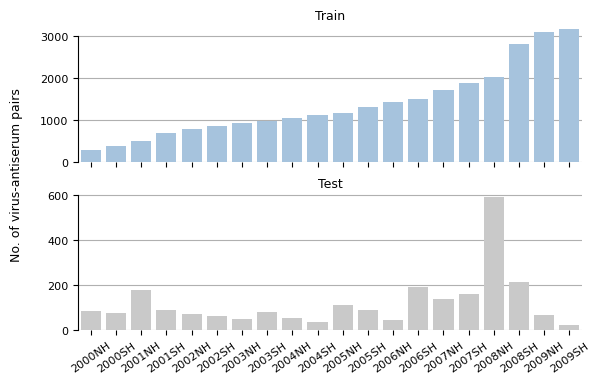

In [8]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(6.5,4))

# plot total no. of virus-antiserum pairs per season for train dataset
sns.barplot(x='season', y='total', data=data[data.dataset == 'Train'],
            ax=axes[0], color='#9DC3E6')

# plot total no. of virus-antiserum pairs per season for test dataset
sns.barplot(x='season', y='total', data=data[data.dataset == 'Test'],
            ax=axes[1], color='#C9C9C9')

# utils_plot.annotate_bars(plot.axes, fs=8, rot=90, decimal=0, gap=10)

# configurations for figure
axes[0].set_axisbelow(True)
axes[1].set_axisbelow(True)
axes[0].grid(axis='y', zorder=0)
axes[1].grid(axis='y', zorder=0)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=35)
axes[0].set_title("Train", fontsize=9, pad=-2)
axes[1].set_title("Test", fontsize=9, pad=-5)
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[0].set_ylabel("")
axes[1].set_ylabel("")
fig.supylabel("No. of virus-antiserum pairs", fontsize=9)

sns.despine(trim=True, bottom=True)

# save figure
fig.savefig(fig_fn, format='svg', bbox_inches='tight')